In [193]:
import pandas as pd

In [ ]:
# df = pd.read_csv("/data/standard_2024_11_23-2025_04_23_cat_labelled - standard_2024_11_23-2025_04_23_cat_labelled.csv")

In [ ]:
df = df.drop(df.columns[0], axis=1)
df.head()

In [196]:
import matplotlib.pyplot as plt

/var/folders/bf/b11n35tn2rq9mr6mw11m8f7w0000gn/T/ipykernel_3244/2529133749.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


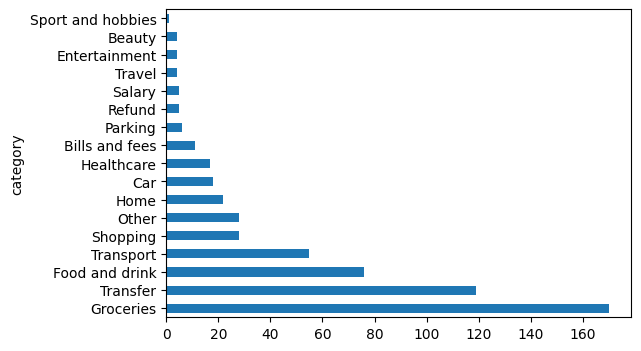

In [197]:
fig, ax = plt.subplots(figsize=(6, 4))
df["category"].value_counts().plot.barh(ax=ax)
fig.show()

In [198]:
df["category"].value_counts(normalize=True)

category
Groceries            0.296684
Transfer             0.207679
Food and drink       0.132635
Transport            0.095986
Shopping             0.048866
Other                0.048866
Home                 0.038394
Car                  0.031414
Healthcare           0.029668
Bills and fees       0.019197
Parking              0.010471
Refund               0.008726
Salary               0.008726
Travel               0.006981
Entertainment        0.006981
Beauty               0.006981
Sport and hobbies    0.001745
Name: proportion, dtype: float64

In [199]:
from sentence_transformers import SentenceTransformer
import umap

In [200]:
texts = df.apply(lambda row: f"{row['transaction_type']}: {row['cleaned_desc']}", axis=1)

In [201]:
df_category_freq = df["category"].value_counts(normalize=True)

<Axes: ylabel='category'>

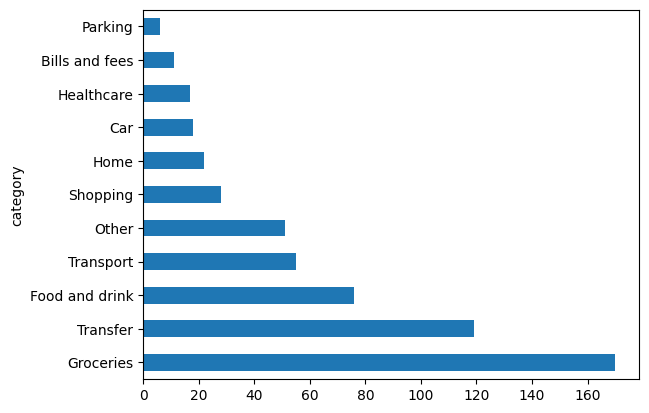

In [202]:
high_freq_classes = df_category_freq[df_category_freq > 0.01].index.tolist()
df["category"] = df["category"].apply(lambda x: "Other" if x not in high_freq_classes else x)
df["category"].value_counts().plot.barh()

In [203]:
df["category"].value_counts(normalize=True)

category
Groceries         0.296684
Transfer          0.207679
Food and drink    0.132635
Transport         0.095986
Other             0.089005
Shopping          0.048866
Home              0.038394
Car               0.031414
Healthcare        0.029668
Bills and fees    0.019197
Parking           0.010471
Name: proportion, dtype: float64

In [204]:
labels = df["category"].tolist()

In [205]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [206]:
labels_encoded = le.fit_transform(labels)

In [207]:
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(texts, show_progress_bar=True)

Batches: 100%|██████████| 18/18 [00:00<00:00, 47.24it/s]


In [208]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine', random_state=42)
umap_embeddings = reducer.fit_transform(embeddings)

/opt/homebrew/anaconda3/envs/fineancial/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/envs/fineancial/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [209]:
import numpy as np
from sklearn.preprocessing import StandardScaler

amounts = df["amount"].values.reshape(-1, 1)
scaled_amounts = StandardScaler().fit_transform(amounts)
emb_plus_amt = np.hstack((embeddings, scaled_amounts)) 
umap_embeddings = reducer.fit_transform(emb_plus_amt)

/opt/homebrew/anaconda3/envs/fineancial/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [210]:
import seaborn as sns

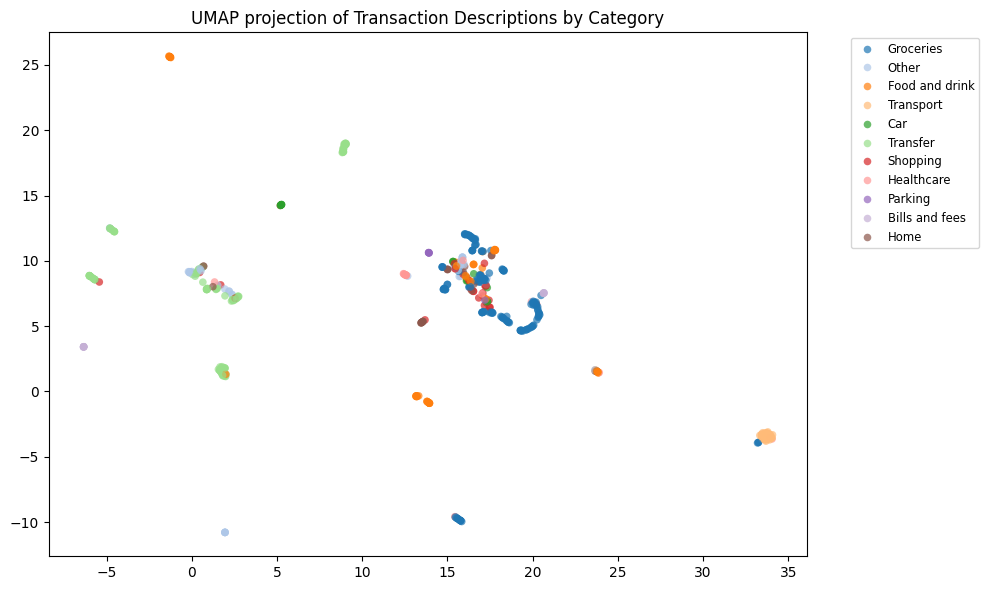

In [213]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=umap_embeddings[:, 0], y=umap_embeddings[:, 1], hue=labels, palette="tab20", s=30, alpha=0.7, linewidth=0)
plt.title("UMAP projection of Transaction Descriptions by Category")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize='small')
plt.tight_layout()
plt.show()